## Unsupervised Machine Learning Algorithm

## KMeans Clustering - 2Blobs Dataset

In [60]:
#Import Packages

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pylab as plt

## Read the Blobs Data Set (Unsupervised ML)

In [61]:
df = datasets.make_blobs(n_samples = 5000)  #sample size may increase/decrease

In [62]:
#print the dataframe
df

(array([[ 4.33988904, -6.00798589],
        [ 3.18464758, -6.44846967],
        [-8.38809417, -0.7290077 ],
        ...,
        [ 3.20042618, -5.12706639],
        [ 1.90626151, -6.45098519],
        [-7.10557615,  0.14702695]]),
 array([2, 2, 0, ..., 2, 2, 0]))

The above Dataset contain 2 arrays. One(First) array will be treated as Input Data. Another(Second) array will be target column.

## Dataset to Dataframe

In [63]:
#Convert dataset's(df) First arry into inputData Dataframe(Features)
inputData = pd.DataFrame(df[0])

In [64]:
#print the top 5 rows of the inputData Dataframe
inputData.head()

,0,1
0,4.339889,-6.007986
1,3.184648,-6.448470
2,-8.388094,-0.729008
3,4.957214,-6.756857
4,-7.525794,-1.095206


In [65]:
#Convert dataset's Second arry into outputData Dataframe(target column)
outputData = pd.DataFrame(df[1])

In [66]:
#print the top 5 rows of the outputData Dataframe
outputData.head()

,0
0,2
1,2
2,0
3,2
4,0


## Data Analysis

In [67]:
#print the shape of the inputData Dataframe
inputData.shape

(5000, 2)

inputData DataFrame contains 5000 rows and 2 columns

In [68]:
#print the shape of the outputData Dataframe
outputData.shape

(5000, 1)

outputData DataFrame contains 5000 rows and 1 column

In [69]:
#information about the inputData
inputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


The inputData contain 5000 entries.Its datatype is float.

In [70]:
#Statistics information about the inputData
inputData.describe()

,0,1
count,5000.000000,5000.000000
mean,-1.096587,-0.419659
std,4.564523,5.019222
min,-10.616706,-9.565093
25%,-6.533238,-5.527614
50%,0.664356,-0.919695
75%,2.684255,5.205920
max,6.331079,9.554040


The above table describe the statistics information about the inputData.This represents the basic information such as minimum value, maximum value,mean,standard deviation and precentile values.

In [71]:
#check null value / not availabe value
inputData.isna().sum()

0    0
1    0
dtype: int64

The inputData does not contain any null value

In [72]:
outputData.isna().sum()

0    0
dtype: int64

The outputData does not contain any null value

In [73]:
inputData.nunique().sum()

10000

In [74]:
outputData.nunique().sum()

3

The above analysis represents that inputData contain 1000 unique values. The outputData contains 3 unique values.

## Data Visualization

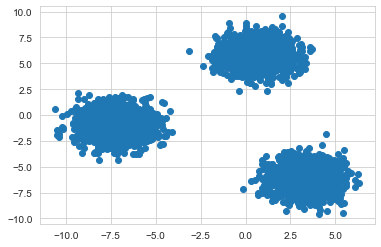

In [75]:
#Plotting Scatter diagram using inputData
plt.scatter(x=inputData[0],y=inputData[1])
plt.show()

The above diagram depicts the column of inputData in Scatter diagra representation.

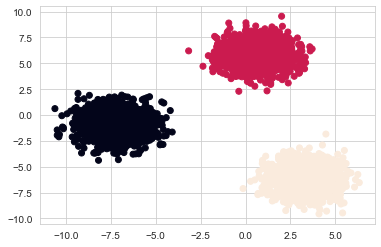

In [87]:
#Plotting Scatter diagram using inputData and outputData (for color representation)
plt.scatter(x=inputData[0],y=inputData[1], c=outputData[0])
plt.show()

The above Diagram shows with color representation of scatter diagram with the help of outputData

## KMeans Clustering algorithm

In [77]:
#import KMeans algorithm from sklearn.cluster package.
from sklearn.cluster import KMeans

In [78]:
#Create a model km_model by using KMeans algorithm. Here default cluster size is 8.
km_model = KMeans(n_clusters=8)

In [79]:
#In this step we have to fit our inputData into KMeans cluster algorithms
km_model.fit(inputData) 

KMeans()

And successfully applied KMeans algorithm to out inputData

In [80]:
#To display centers of each cluster.aka Centroid. Total no of cluster is 8
km_model.cluster_centers_

array([[ 1.61209098,  5.43141013],
       [-6.11559513, -0.71129157],
       [ 3.27373045, -7.05286216],
       [-0.18494316,  5.24800472],
       [-7.96390279, -0.17686909],
       [ 3.26306156, -5.45775695],
       [-7.4591217 , -1.9221841 ],
       [ 0.54555998,  6.83545512]])

In [81]:
len(km_model.cluster_centers_)

8

Intertia : It represents the sum of distances of all the records from the centroid. If we have lesser intertia value will form a better model.

In [82]:
km_model.inertia_

5219.517122329447

Here intertia value is somewhat high. Because our model contains 5000 rows.

In [83]:
#Represents the maximum number of iterations to from the cluster.
km_model.max_iter

300

In [84]:
#Label representation
km_model.labels_

array([5, 2, 4, ..., 5, 2, 4])

We created 8 clusters. The cluster label will be assigned i.e from 1 through 8 to all the inputData

## Plotting the Clusters

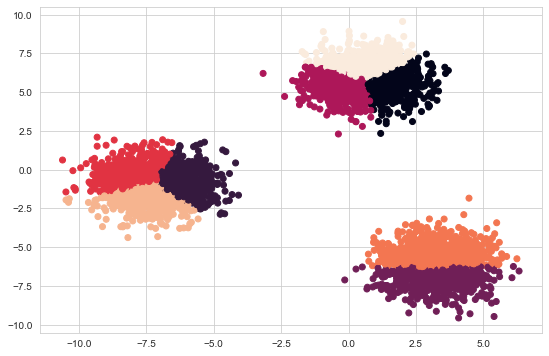

In [85]:
plt.figure(figsize=(9, 6))
plt.scatter(x=inputData[0],y=inputData[1],c=km_model.labels_)
plt.show()

The above scatter diagram represents 8 clusters with 8 different colors.

## Clusters with Centroid

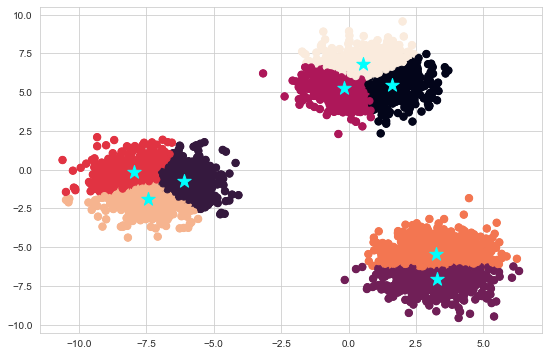

In [86]:
sns.set_style('whitegrid')
plt.figure(figsize=(9, 6))
plt.scatter(x=inputData[0], y=inputData[1], c = km_model.labels_,  s = 54)
plt.scatter(x=inputData[0], y=inputData[1], c = km_model.labels_,  s = 45)
plt.scatter(x=km_model.cluster_centers_[:,0], y=km_model.cluster_centers_[:,1], c = 'cyan', marker = '*', s= 200)
plt.show()

The above scatter diagram represents the cluster with centroid values (* symbol represents the centroid values)

## Performance of KMeans Model.

In [88]:
#import metrics from  sklearn package
from sklearn import metrics

In [89]:
score = metrics.silhouette_score(X=inputData,labels=km_model.labels_)
print("Silhouette Score is",score)

Silhouette Score is 0.32588946246817


The peformance of the KMean model will be calculated by using the Silhouette Score. Our model gives the Silhouette Score 0.32. It is a good score.

## Best Number of Clusters using Elbow method and Intertia value Calculation

In [90]:
n_clus = list(range(1,9))

interia_list = []

for i in n_clus:
    km_model.i = KMeans(n_clusters=i)
    km_model.fit(inputData)
        
    interia_list.append(km_model.inertia_)
    
print("No of clusters\n",n_clus)
print("Inertia List\n",interia_list)

No of clusters
 [1, 2, 3, 4, 5, 6, 7, 8]
Inertia List
 [5199.1118131169615, 5220.840976362314, 5225.245097829072, 5215.625806506874, 5266.050957769355, 5215.008925561804, 5219.250776703535, 5196.877106160824]


The above code represents the number of cluster and Intertia value calculation.

## Elbow Method Vs Intertia

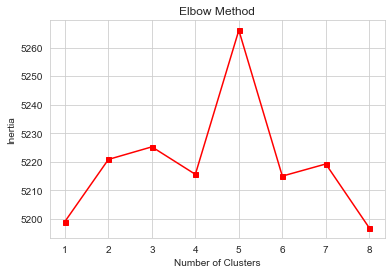

In [92]:
plt.plot(n_clus,interia_list,marker='s',markersize=5,c='r')
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

The above graph shows that the best number of cluster is 5. In the cluster count 5, the best intertia value is returned.
So we also perform the above tasks with 5 clusters.

## 5 Clusters

In [93]:
km_model_5 = KMeans(n_clusters=5,init='random')

In [94]:
km_model_5.fit(inputData)

KMeans(init='random', n_clusters=5)

In [95]:
km_model_5.labels_

array([2, 2, 3, ..., 0, 0, 3])

## Plotting Clusters

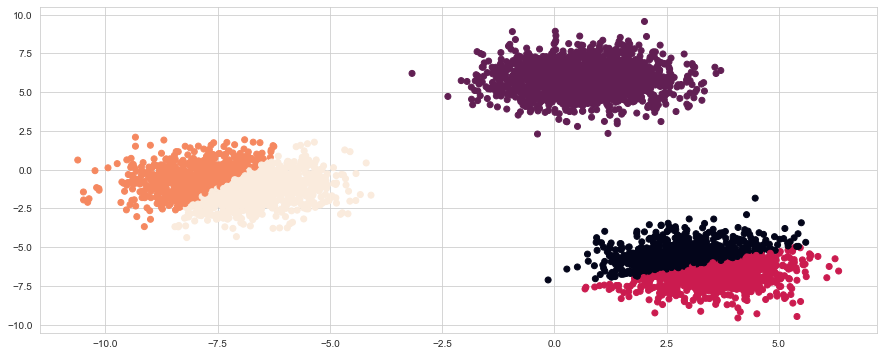

In [96]:
plt.figure(figsize=(15,6))
plt.scatter(x=inputData[0],y=inputData[1],c=km_model_5.labels_)
plt.show()

## Clusters with Centroid

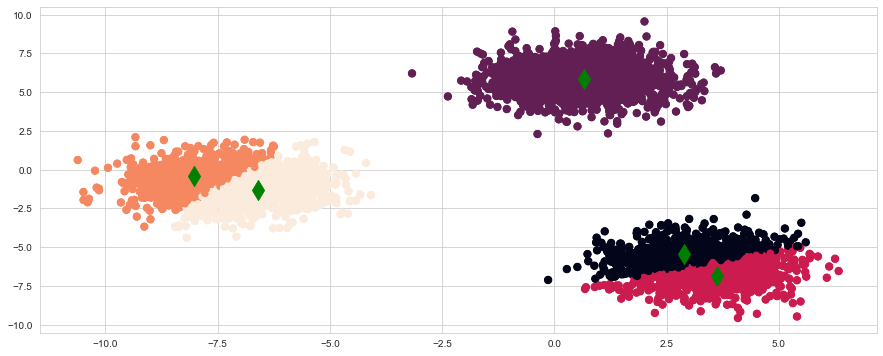

In [105]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 6),)
plt.scatter(x=inputData[0], y=inputData[1], c = km_model_5.labels_, s = 54)
plt.scatter(x=inputData[0], y=inputData[1], c = km_model_5.labels_, s = 45)
plt.scatter(x=km_model_5.cluster_centers_[:,0], y=km_model_5.cluster_centers_[:,1], c = 'green', marker = 'd', s= 200)
plt.show()

## Performance

In [106]:
km_model_5.inertia_

7737.786225139579

In [107]:
km_model_5.cluster_centers_

array([[ 2.87746367, -5.44744659],
       [ 0.655349  ,  5.84834902],
       [ 3.62669531, -6.83263118],
       [-8.01820174, -0.4346069 ],
       [-6.60205581, -1.32337452]])

In [108]:
len(km_model_5.cluster_centers_)

5

In [109]:
score = metrics.silhouette_score(X=inputData,labels=km_model_5.labels_)
print("Silhouette Score is",score)

Silhouette Score is 0.4815539692777109


In [110]:
n_clus = list(range(1,6))

interia_list = []

for i in n_clus:
    km_model_5.i = KMeans(n_clusters=i)
    km_model_5.fit(inputData)
        
    interia_list.append(km_model_5.inertia_)
    
print("No of clusters\n",n_clus)
print("Inertia List\n",interia_list)

No of clusters
 [1, 2, 3, 4, 5]
Inertia List
 [7717.789956446154, 7745.90758987825, 7813.719537278045, 7787.22405810813, 7730.54107770641]


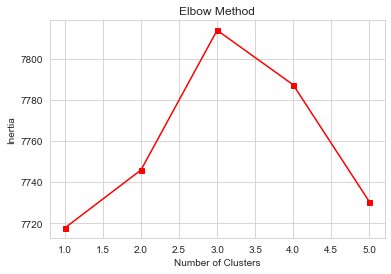

In [111]:
plt.plot(n_clus,interia_list,marker='s',markersize=5,c='r')
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

The above graph represents Clusters value 4 and 5 equally generate the best intertia values.

## Conclusion

The k-means algorithm is very fast and one of the fastest clustering algorithms available.
The preformance can be calculated by Silhouette Score. 
Intertia and Elbow methodsa are used to define best number of clusters for the better performance of the algorithm.